In [119]:
import mplhep as hep
import matplotlib.pyplot as plt
from wremnants.datasets.datagroups import datagroups2016
from utilities import boostHistHelpers as hh,common
from wremnants import plot_tools,syst_tools
from wremnants import histselections as sel
import hist
import narf
import numpy as np
import pickle,lz4.frame

In [3]:
%load_ext autoreload
%autoreload 2

In [193]:
groups = datagroups2016("../mw_with_mu_eta_pt_nnpdf31.pkl.lz4")


In [ ]:
groups.results["WplusmunuPostVFP"]["output"].keys()

In [ ]:
# This is for reading groups
groups.loadHistsForDatagroups("nominal", syst="", procsToRead=["Wmunu"])
groups.loadHistsForDatagroups("", syst="muonScaleSyst", procsToRead=["Wmunu"])
groups.loadHistsForDatagroups("", syst="muonScaleSyst_responseWeights", procsToRead=["Wmunu"])
histInfo = groups.getDatagroups()

In [ ]:
# This is for reading groups
groups.loadHistsForDatagroups("nominal", syst="", procsToRead=["Wmunu"])
groups.loadHistsForDatagroups("", syst="qcdScaleByHelicity", procsToRead=["Wmunu"])
groups.loadHistsForDatagroups("", syst="pdfNNPDF31", procsToRead=["Wmunu"])
groups.loadHistsForDatagroups("", syst="pdfMMHT", procsToRead=["Wmunu"])
groups.loadHistsForDatagroups("", syst="pdfCT18", procsToRead=["Wmunu"])
histInfo = groups.getDatagroups()

In [ ]:
histInfo["Wmunu"]["pdfCT18"]

In [ ]:
hh.divideHists(histInfo["Wmunu"]["pdfMMHT"][{"tensor_axis_0" : 0}].project("eta"), histInfo["Wmunu"]["nominal"].project("eta")).plot(label="MMHT14")
hh.divideHists(histInfo["Wmunu"]["pdfCT18"][{"tensor_axis_0" : 0}].project("eta"), histInfo["Wmunu"]["nominal"].project("eta")).plot(label="CT18")
plt.legend()
plt.ylim([0.95, 1.05])


In [ ]:
hh.divideHists(histInfo["Wmunu"]["pdfMMHT"][{"tensor_axis_0" : 0}].project("pt"), histInfo["Wmunu"]["nominal"].project("pt")).plot(label="MMHT14")
hh.divideHists(histInfo["Wmunu"]["pdfCT18"][{"tensor_axis_0" : 0}].project("pt"), histInfo["Wmunu"]["nominal"].project("pt")).plot(label="CT18")
plt.legend()
plt.ylim([0.95, 1.05])


In [ ]:
hscaleUp = procDict["Wmunu"]["muonScaleSyst"][{"downUpVar" : 1, "scaleEtaSlice" : 1.j}]
hscaleDown = procDict["Wmunu"]["muonScaleSyst"][{"downUpVar" : 0, "scaleEtaSlice" : 1.j}]

In [ ]:
hnom = procDict["Wmunu"]["nominal"]
# Can also read specific samples by accessing the original 
hnomminus = groups.results["WminusmunuPostVFP"]["output"]["nominal"]

In [ ]:
hscaleUp.project("pt").plot()

In [ ]:
hh.divideHists(hscaleUp.project("pt"), hnom.project("pt")).plot()
hh.divideHists(hscaleDown.project("pt"), hnom.project("pt")).plot()
plt.ylim([0.995, 1.005])

In [ ]:
combine = datagroups2016("../temp/WMassCombineInput.root")

In [ ]:
procs = combine.datagroupsForHist("x_Wmunu_plus", label="nominal")
procs = combine.datagroupsForHist("x_Wmunu_CMS_scale_m_ieta0Up_plus", label="scaleEta0Up")
procs = combine.datagroupsForHist("x_Wmunu_CMS_scale_m_ieta0Down_plus", label="scaleEta0Down")
procs = combine.datagroupsForHist("x_Wmunu_pdf1NNPDF31Up_plus", label="pdf1Up")
procs = combine.datagroupsForHist("x_Wmunu_pdf1NNPDF31Down_plus", label="pdf1Down")

In [ ]:
hh.divideHists(procs["Wmunu"]["scaleEta0Up"], procs["Wmunu"]["nominal"]).plot()
hh.divideHists(procs["Wmunu"]["scaleEta0Down"], procs["Wmunu"]["nominal"]).plot()
#plt.ylim([0.99, 1.01])

In [ ]:
hmirror = hh.mirrorHist(hnom, procs["Wmunu"]["pdf1Up"])

In [ ]:
hh.divideHists(procs["Wmunu"]["pdf1Up"].project("pt"),procs["Wmunu"]["nominal"].project("pt")).plot()
hh.divideHists(procs["Wmunu"]["pdf1Down"].project("pt"),procs["Wmunu"]["nominal"].project("pt")).plot()
plt.ylim([0.99, 1.01])

In [ ]:
hists = [sel.unrolledHist(h) for h in [procs["Wmunu"]["nominal"], procs["Wmunu"]["scaleEta0Up"], procs["Wmunu"]["scaleEta0Down"]]]
#hists = [h.project("pt") for h in [procs["Wmunu"]["nominal"], procs["Wmunu"]["pdf1Up"], procs["Wmunu"]["pdf1Down"]]]
colors = ["black", "red", "pink"]
labels = ["nominal", "scaleEta0Up", "scaleEta0Down"]

fig = plotTools.makePlotsWithRatioToRef(hists, labels, colors, xlabel=r"($\eta$, p$_{T}$) bin", scale=1e5,rrange=[0.998, 1.002])


In [ ]:
hists = [sel.unrolledHist(h) for h in [procs["Wmunu"]["nominal"], procs["Wmunu"]["pdf1Up"], procs["Wmunu"]["pdf1Down"]]]
colors = ["black", "red", "pink"]
labels = ["nominal", "pdf1Up", "pdf1Down"]

fig = plotTools.makePlotsWithRatioToRef(hists, labels, colors, xlabel=r"($\eta$, p$_{T}$) bin", scale=1e5,rrange=[0.995, 1.005])


In [ ]:
histInfo = groups.getDatagroups()
groups.loadHistsForDatagroups("nominal", syst="", selectSignal=True, label="nominal", procsToRead=["Wmunu"])

In [ ]:
groups.loadHistsForDatagroups("", syst="qcdScaleByHelicity", selectSignal=True, label="qcdScaleByHelicity", procsToRead=["Wmunu"], forceNonzero=False)

In [ ]:
histInfo["Wmunu"]["qcdScaleByHelicity"]

In [ ]:
histInfo["Wmunu"]["qcdScaleByHelicitySum"] = syst_tools.scale_helicity_hist_to_variations(histInfo["Wmunu"]["qcdScaleByHelicity"])

In [ ]:
s = hist.tag.Slicer()
hVarNom = histInfo["Wmunu"]["qcdScaleByHelicity"][{"ptVgen" : s[::hist.sum], "chargeVgen" : s[::hist.sum], "helicity" : s[::hist.sum], "muRfact" : s[1.j], "muFfact" : s[1.j] }]


In [ ]:
selections = [{"muRfact" : hist.loc(j), "muFfact" : hist.loc(j), "helicity" : i, "ptVgen" : 0, "chargeVgen" : -1j} for i in range(2) for j in [0.5,1.,2.]]
names = [f"muR{j}_muF{j}_hel_sigma{i}_ptVgen0_minus" for i in range(2) for j in [0.5,1.,2.]]

In [ ]:
hists = [sel.unrolledHist(histInfo["Wmunu"]["nominal"])]
hists.extend([sel.unrolledHist(histInfo["Wmunu"]["qcdScaleByHelicitySum"][s]) for s in selections])
labels = ["nominal"]+names
colors = ["black", "blue", "purple", "green", "pink", "orange", "lightblue"]

In [ ]:
hists = [histInfo["Wmunu"]["nominal"].project("pt")]
hists.extend([histInfo["Wmunu"]["qcdScaleByHelicitySum"][s].project("pt") for s in selections])

In [ ]:
fig = plot_tools.makePlotWithRatioToRef(hists, labels, colors, xlabel=r"p$_{T}$ (GeV)", ymax=3e7,rrange=[0.99, 1.01])

In [ ]:
selections = [{"muRfact" : 1.j, "muFfact" : 1.j, "helicity" : i} for i in range(9)]
#histInfo["Wmunu"]["qcdScaleByHelicity"] = syst_tools.scale_helicity_hist_to_variations(histInfo["Wmunu"]["qcdScaleByHelicity"], sum_ptV=True)
hists = [sel.unrolledHist(histInfo["Wmunu"]["nominal"])]
hists.extend([sel.unrolledHist(histInfo["Wmunu"]["qcdScaleByHelicity"][s]) for s in selections])
labels = ["nominal"]+[f"$sigma_{i-1}$*angular" if i != 0 else "$\sigma_\mathrm{UL}$" for i in range(9)]
colors = ["black", "blue", "purple", "green", "pink", "orange", "lightblue", "red", "lightgreen", "yellow"]
print(len(hists), len(labels), len(colors))
fig = plot_tools.makePlotWithRatioToRef(hists, labels, colors, xlabel=r"($\eta_{\ell}$, p$_{T}$) bin", ymax=8e6,rrange=[-0.2, 1.5])
fig.get_axes()[0].set_ylim([-1e4, 1.8e5])

In [ ]:
angular = [
    r"(1+\cos^{2}\theta)",
    r"(1-3\cos^{2}\theta)",
    r"\sin2\theta\cos\phi",
    r"\sin^{2}\theta",
    r"\sin\theta\cos\phi",
    r"\cos\phi",
    r"\sin^{2}\theta\sin2\theta",
    r"\sin2\theta\sin\phi",
    r"\sin\theta\sin\phi",
]

In [ ]:
selections = [{"muRfact" : 1.j, "muFfact" : 1.j, "helicity" : i} for i in range(9)]
#histInfo["Wmunu"]["qcdScaleByHelicity"] = syst_tools.scale_helicity_hist_to_variations(histInfo["Wmunu"]["qcdScaleByHelicity"], sum_ptV=True)
hists = [sel.unrolledHist(histInfo["Wmunu"]["nominal"])]
hists.extend([sel.unrolledHist(histInfo["Wmunu"]["qcdScaleByHelicity"][s]) for s in selections])
labels = ["nominal"]+["$\sigma_{%i}%s$" % (i-1, angular[i]) for i in range(0,9)]
colors = ["black", "blue", "purple", "green", "pink", "orange", "lightblue", "red", "lightgreen", "yellow"]
print(len(hists), len(labels), len(colors))
fig = plot_tools.makePlotWithRatioToRef(hists, labels, colors, xlabel=r"($\eta_{\ell}$, p$_{T}$) bin", ymax=8e6,rrange=[0.9, 1.1], rlabel="$x/\sigma_{total}$")
fig.get_axes()[0].set_ylim([-1e4, 1.8e5])

In [ ]:
selections = [{"muRfact" : 1.j, "muFfact" : 1.j, "helicity" : i} for i in range(9)]
hists = [sel.unrolledHist(histInfo["Wmunu"]["nominal"])]
hists.extend([sel.unrolledHist(histInfo["Wmunu"]["qcdScaleByHelicity"][s]) for s in selections])
labels = ["nominal"]+["$\sigma_{%i}%s$" % (i-1, angular[i]) for i in range(0,9)]
colors = ["black", "blue", "purple", "green", "pink", "orange", "lightblue", "red", "lightgreen", "yellow"]
print(len(hists), len(labels), len(colors))
fig = plot_tools.makePlotWithRatioToRef(hists, labels, colors, xlabel=r"($\eta_{\ell}$, p$_{T}$) bin", ymax=8e6,rrange=[-0.05, 0.1])
fig.get_axes()[0].set_ylim([-1e4, 1.8e5])

In [ ]:
histInfo["Wmunu"]["qcdScaleByHelicity"]

In [ ]:
histInfo["Wmunu"]["nominal"].project("pt").plot()
histInfo["Wmunu"]["qcdScaleByHelicity"][{"muRfact" : 1.j, "muFfact" : 1.j}].project("pt").plot()

In [ ]:
print(groups.results["WminusmunuPostVFP"]["output"]["nominal"].sum(flow=True))
print(groups.results["WminusmunuPostVFP"]["output"]["qcdScale"][{"muRfact" : 1.j, "muFfact" : 1.j}].sum(flow=True))


In [ ]:
groups.results["WminusmunuPostVFP"]["output"]["nominal"].project("pt").plot(label="nominal")
groups.results["WminusmunuPostVFP"]["output"]["qcdScaleByHelicity"][{"muRfact" : 1.j, "muFfact" : 1.j}].project("pt").plot()
plt.legend()

In [ ]:
groups.results["WplusmunuPostVFP"]["output"]["nominal"].project("pt").plot(label="nominal")
groups.results["WplusmunuPostVFP"]["output"]["qcdScaleByHelicity"][{"muRfact" : 1.j, "muFfact" : 1.j}].project("pt").plot()
plt.legend()

In [ ]:
groups.results["WminusmunuPostVFP"]["output"]["qcdScaleByHelicity"]

In [ ]:
#groups.results["WplusmunuPostVFP"]["output"]["qcdScaleByHelicity"]
groups.results["WminusmunuPostVFP"]["output"]["qcdScaleByHelicity"]

In [ ]:
orig = groups.results["WplusmunuPostVFP"]["output"]["qcdScaleByHelicity"].copy()
orig

In [ ]:
orig_sum = orig +  groups.results["WminusmunuPostVFP"]["output"]["qcdScaleByHelicity"]

In [195]:
groups.loadHistsForDatagroups("nominal", syst="qcdScaleByHelicity", procsToRead=["Wmunu"], forceNonzero=False, selectSignal=False,
    preOpMap={x : syst_tools.scale_helicity_hist_to_variations for x in common.vprocs},
    preOpArgs={"sum_axis" : [ "helicity", "ptVgen",]})

---> applying custom operation for proc WplusmunuPostVFP group Wmunu
    Before WeightedSum(value=8.05569e+08, variance=1.20407e+09) ('eta', 'pt', 'charge', 'passIso', 'passMT', 'ptVgen', 'chargeVgen', 'helicity', 'muRfact', 'muFfact')
    Before central value WeightedSum(value=8.9784e+07, variance=1.01559e+08)
Hist(
  Regular(48, -2.4, 2.4, name='eta', label='eta'),
  Regular(29, 26, 55, name='pt', label='pt'),
  Regular(2, -2, 2, underflow=False, overflow=False, name='charge', label='charge'),
  Boolean(name='passIso', label='passIso'),
  Boolean(name='passMT', label='passMT'),
  Variable([0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 14, 16, 18, 20, 23, 27, 32, 40, 55, 100], underflow=False, name='ptVgen', label='ptVgen'),
  Regular(2, -2, 2, underflow=False, overflow=False, name='chargeVgen', label='chargeVgen'),
  Integer(-1, 8, underflow=False, overflow=False, name='helicity', label='helicity'),
  Variable([0.25, 0.75, 1.25, 2.75], underflow=False, overflow=False, name='muRfact', label='muR

In [272]:
groups.loadHistsForDatagroups("nominal", syst="qcdScaleByHelicity", procsToRead=["Zmumu"], forceNonzero=False, selectSignal=False,               
    preOpMap={x : syst_tools.scale_helicity_hist_to_variations for x in common.vprocs},
    preOpArgs={"sum_axis" : ["ptVgen",]})

---> applying custom operation for proc ZmumuPostVFP group Zmumu
    Before WeightedSum(value=1.15654e+08, variance=2.03013e+08) ('eta', 'pt', 'charge', 'passIso', 'passMT', 'ptVgen', 'chargeVgen', 'helicity', 'muRfact', 'muFfact')
    Before central value WeightedSum(value=1.288e+07, variance=1.81318e+07)
Hist(
  Regular(48, -2.4, 2.4, name='eta', label='eta'),
  Regular(29, 26, 55, name='pt', label='pt'),
  Regular(2, -2, 2, underflow=False, overflow=False, name='charge', label='charge'),
  Boolean(name='passIso', label='passIso'),
  Boolean(name='passMT', label='passMT'),
  Variable([0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 14, 16, 18, 20, 23, 27, 32, 40, 55, 100], underflow=False, name='ptVgen', label='ptVgen'),
  Regular(2, -2, 2, underflow=False, overflow=False, name='chargeVgen', label='chargeVgen'),
  Integer(-1, 8, underflow=False, overflow=False, name='helicity', label='helicity'),
  Variable([0.25, 0.75, 1.25, 2.75], underflow=False, overflow=False, name='muRfact', label='muRfact'

In [322]:
groups.loadHistsForDatagroups("nominal", syst="", procsToRead=["Fake",], selectSignal=True, forceNonzero=False)

-> Adding WeightedSum(value=1.61493e+08, variance=1.61493e+08)
+Now sum is WeightedSum(value=1.61493e+08, variance=1.61493e+08) after dataPostVFP
-> Adding WeightedSum(value=-7.26107e+07, variance=7.20293e+07)
+Now sum is WeightedSum(value=8.88824e+07, variance=2.33522e+08) after WplusmunuPostVFP
-> Adding WeightedSum(value=-5.62563e+07, variance=5.47208e+07)
+Now sum is WeightedSum(value=3.26261e+07, variance=2.88243e+08) after WminusmunuPostVFP
-> Adding WeightedSum(value=-2.18549e+06, variance=435505)
+Now sum is WeightedSum(value=3.04406e+07, variance=2.88679e+08) after WplustaunuPostVFP
-> Adding WeightedSum(value=-1.82772e+06, variance=1.89654e+06)
+Now sum is WeightedSum(value=2.86129e+07, variance=2.90575e+08) after WminustaunuPostVFP
-> Adding WeightedSum(value=-5.42896e+06, variance=2.97692e+06)
+Now sum is WeightedSum(value=2.31839e+07, variance=2.93552e+08) after ZmumuPostVFP
-> Adding WeightedSum(value=-558717, variance=103914)
+Now sum is WeightedSum(value=2.26252e+07, va

In [347]:
groups.loadHistsForDatagroups("nominal", syst="qcdScale", procsToRead=["Fake",], forceNonzero=False, selectSignal=True,
    preOpMap={x : syst_tools.scale_helicity_hist_to_variations for x in common.vprocs},
                             )#preOpArgs={"sum_axis" : ["ptVgen"]})

-> Adding WeightedSum(value=1.61493e+08, variance=1.61493e+08)
+Now sum is WeightedSum(value=1.61493e+08, variance=1.61493e+08) after dataPostVFP
-> Adding WeightedSum(value=-3.04946e+09, variance=3.1689e+09)
+Now sum central val is WeightedSum(value=3.73325e+09, variance=9.95161e+09) after WplusmunuPostVFP
-> Adding WeightedSum(value=-2.36262e+09, variance=2.40742e+09)
+Now sum central val is WeightedSum(value=1.37063e+09, variance=1.2359e+10) after WminusmunuPostVFP
-> Adding WeightedSum(value=-9.17851e+07, variance=1.91599e+07)
+Now sum central val is WeightedSum(value=1.27884e+09, variance=1.23782e+10) after WplustaunuPostVFP
-> Adding WeightedSum(value=-7.67594e+07, variance=8.34377e+07)
+Now sum central val is WeightedSum(value=1.20208e+09, variance=1.24616e+10) after WminustaunuPostVFP
-> Adding WeightedSum(value=-2.28016e+08, variance=1.30984e+08)
+Now sum central val is WeightedSum(value=9.74066e+08, variance=1.25926e+10) after ZmumuPostVFP
-> Adding WeightedSum(value=-2.34661

In [241]:
res = groups.getDatagroups()

In [351]:
res["Fake"]["qcdScale"][{"muRfact" : 1.j, "muFfact" : 1.j, "ptVgen" : 10, "chargeVgen" : -1.j}]

Hist(
  Regular(48, -2.4, 2.4, name='eta', label='eta'),
  Regular(29, 26, 55, name='pt', label='pt'),
  Regular(2, -2, 2, underflow=False, overflow=False, name='charge', label='charge'),
  storage=Weight()) # Sum: WeightedSum(value=3.63373e+06, variance=2.2648e+07) (WeightedSum(value=4.9768e+06, variance=2.97148e+07) with flow)

In [350]:
res["Fake"]["nominal"]

Hist(
  Regular(48, -2.4, 2.4, name='eta', label='eta'),
  Regular(29, 26, 55, name='pt', label='pt'),
  Regular(2, -2, 2, underflow=False, overflow=False, name='charge', label='charge'),
  storage=Weight()) # Sum: WeightedSum(value=3.63338e+06, variance=2.24412e+07) (WeightedSum(value=4.97632e+06, variance=2.94862e+07) with flow)

(0.9, 1.1)

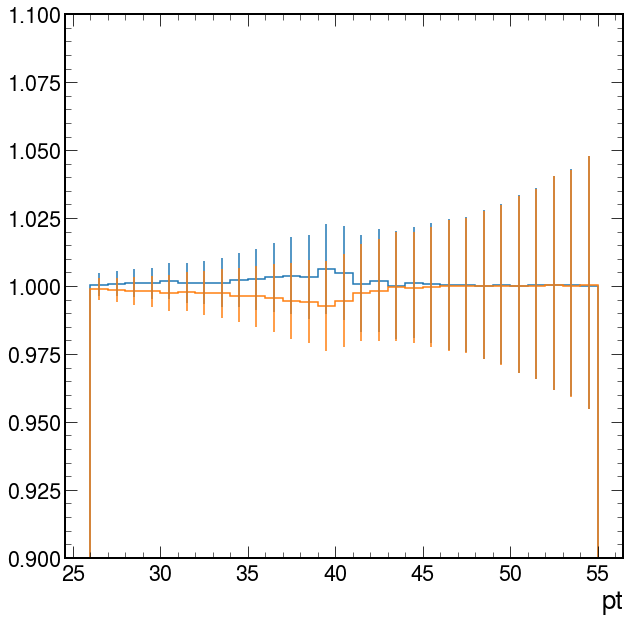

In [353]:
hh.divideHists(res["Fake"]["qcdScale"][{"muRfact" : 0.5j, "muFfact" : 0.5j, "ptVgen" :1, "chargeVgen" : 1.j}].project("pt"),
    res["Fake"]["nominal"].project("pt")).plot()
hh.divideHists(res["Fake"]["qcdScale"][{"muRfact" : 2j, "muFfact" : 2j, "ptVgen" :1, "chargeVgen" : 1.j}].project("pt"),
    res["Fake"]["nominal"].project("pt")).plot()
plt.ylim([0.9, 1.1])

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f82b690e560>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

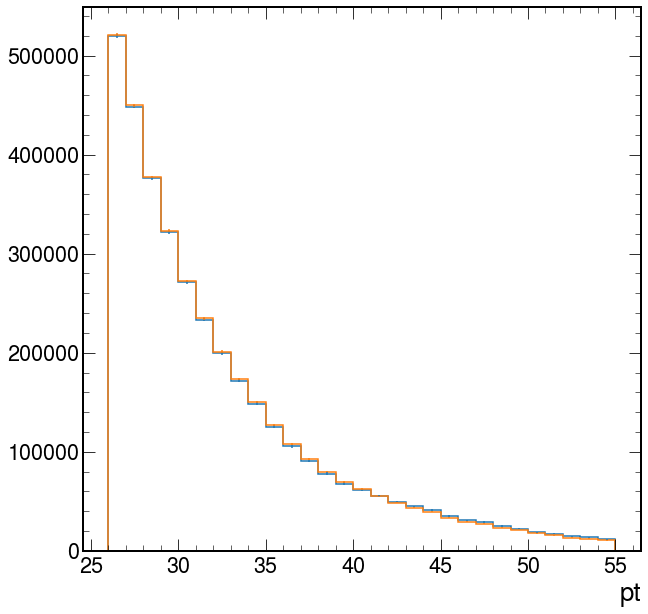

In [326]:
res["Fake"]["qcdScaleByHelicity"][{"muRfact" : 2j, "muFfact" : 2j}].project("pt").plot()
res["Fake"]["nominal"].project("pt").plot()



In [212]:
read = pickle.load(lz4.frame.open("../mw_with_mu_eta_pt_nnpdf31.pkl.lz4", "rb"))

In [135]:
print(res["WplusmunuPostVFP"]["output"]["qcdScaleByHelicity"][{"helicity" : s[::hist.sum], "muRfact" : 1.j, "muFfact" :1.j}].sum())
print(res["WplusmunuPostVFP"]["output"]["qcdScaleByHelicity"][{"helicity" : -1.j, "muRfact" : -1.j, "muFfact" :1.j,}].sum())

WeightedSum(value=7.75587e+07, variance=8.8242e+07)
WeightedSum(value=7.29225e+07, variance=8.45409e+07)


In [171]:
groups.results["WplusmunuPostVFP"]["output"]["qcdScaleByHelicity"][{"chargeVgen" : s[::hist.sum], "ptVgen" : s[::hist.sum], "helicity" : s[::hist.sum], "muRfact" : -1.j, "muFfact" :1.j,}]

Hist(
  Regular(48, -2.4, 2.4, name='eta', label='eta'),
  Regular(29, 26, 55, name='pt', label='pt'),
  Regular(2, -2, 2, underflow=False, overflow=False, name='charge', label='charge'),
  Boolean(name='passIso', label='passIso'),
  Boolean(name='passMT', label='passMT'),
  storage=Weight()) # Sum: WeightedSum(value=7.81358e+07, variance=8.74671e+07) (WeightedSum(value=8.96738e+07, variance=9.97315e+07) with flow)

In [227]:
groups.results["WplusmunuPostVFP"]["output"]["nominal"]

Hist(
  Regular(48, -2.4, 2.4, name='eta', label='eta'),
  Regular(29, 26, 55, name='pt', label='pt'),
  Regular(2, -2, 2, underflow=False, overflow=False, name='charge', label='charge'),
  Boolean(name='passIso', label='passIso'),
  Boolean(name='passMT', label='passMT'),
  storage=Weight()) # Sum: WeightedSum(value=7.80283e+07, variance=9.64282e+07) (WeightedSum(value=8.97894e+07, variance=1.10144e+08) with flow)

In [253]:
res["Wmunu"]["qcdScaleByHelicity"][{"chargeVgen" : 1.j, "muRfact" : 1j, "muFfact" : 1j, "helicity" : 4.j, "ptVgen" : 1}]

Hist(
  Regular(48, -2.4, 2.4, name='eta', label='eta'),
  Regular(29, 26, 55, name='pt', label='pt'),
  Regular(2, -2, 2, underflow=False, overflow=False, name='charge', label='charge'),
  Boolean(name='passIso', label='passIso'),
  Boolean(name='passMT', label='passMT'),
  storage=Weight()) # Sum: WeightedSum(value=7.80235e+07, variance=8.91069e+07) (WeightedSum(value=8.9784e+07, variance=1.0192e+08) with flow)

(0.96, 1.04)

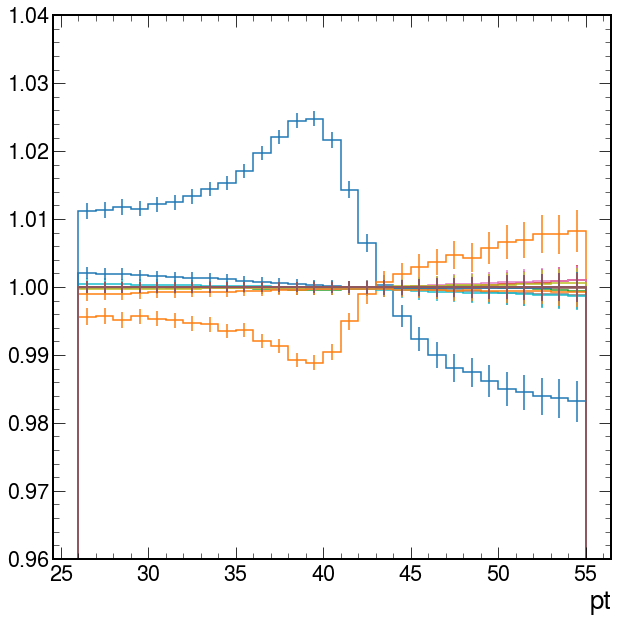

In [264]:
for i in range(8):
    hh.divideHists(res["Wmunu"]["qcdScaleByHelicity"][{"chargeVgen" : 1.j, "muRfact" : 2j, "muFfact" : 2j, "helicity" : i, }].project("pt"),
    groups.results["WplusmunuPostVFP"]["output"]["nominal"].project("pt")).plot()
    hh.divideHists(res["Wmunu"]["qcdScaleByHelicity"][{"chargeVgen" : 1.j, "muRfact" : 0.5j, "muFfact" : 0.5j, "helicity" : i, }].project("pt"),
    groups.results["WplusmunuPostVFP"]["output"]["nominal"].project("pt")).plot()
plt.ylim([0.96, 1.04])

In [367]:
print(res["Fake"]["nominal"][{"charge" : 1.j}].sum())
print(res["Fake"]["nominal"][{"charge" : -1.j}].sum())

WeightedSum(value=1.75766e+06, variance=1.16929e+07)
WeightedSum(value=1.87572e+06, variance=1.07484e+07)


In [382]:
res["Fake"]["qcdScale"].axes["ptVgen"].size

20

In [398]:
import uproot
combf = uproot.open("../test/WMassCombineInput.root")

In [399]:
print(combf["x_Fake_plus"].to_hist().sum())
print(combf["x_Fake_minus"].to_hist().sum())

WeightedSum(value=1.75766e+06, variance=0)
WeightedSum(value=1.87572e+06, variance=0)


In [400]:
refm = combf["x_Fake_minus"].to_hist().sum().value
refp = combf["x_Fake_plus"].to_hist().sum().value

In [405]:
res["Fake"]["qcdScale"].axes["ptVgen"].size

20

In [407]:
for c in ["minus", "plus"]:
    for i in range(0,int(res["Fake"]["qcdScale"].axes["ptVgen"].size/2)):
        print("Q=", c, "bin", i, combf[f"x_Fake_QCDscale_genV{c}genPtV{i}muRmuFDown_plus"].to_hist().sum().value/refp)

Q= minus bin 0 0.9999868455309749
Q= minus bin 1 0.9999883002805192
Q= minus bin 2 0.9999875925950494
Q= minus bin 3 0.9999872253225376
Q= minus bin 4 0.9999872829623453
Q= minus bin 5 0.9999871210157846
Q= minus bin 6 0.9999870499896456
Q= minus bin 7 0.9999869456337404
Q= minus bin 8 0.9999883524529881
Q= minus bin 9 0.9999902317386176


KeyInFileError: not found: 'x_Fake_QCDscale_genVplusgenPtV0muRmuFDown_plus' (with any cycle number)

    Available keys: 'x_Fake_QCDscale_gengenVplusgenPtV0muRmuFDown_plus;1', 'x_Fake_QCDscale_genVminusgenPtV0muRmuFDown_plus;1', 'x_Fake_QCDscale_gengenVplusgenPtV1muRmuFDown_plus;1', 'x_Fake_QCDscale_gengenVplusgenPtV2muRmuFDown_plus;1'...

in file ../test/WMassCombineInput.root